# Generate meta-analysis-related figures for manuscript

In [1]:
%matplotlib inline
import os.path as op

import matplotlib.pyplot as plt
from nilearn import plotting

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:92: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
results_dir = op.abspath("results/")
FIG_WIDTH = 6
ROW_HEIGHT = 2  # good row height for width of 10

## Figure 4: Coordinate-based meta-analysis results

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/struct.py:155: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  warnings.warn("Default resolution of the MNI template will change "


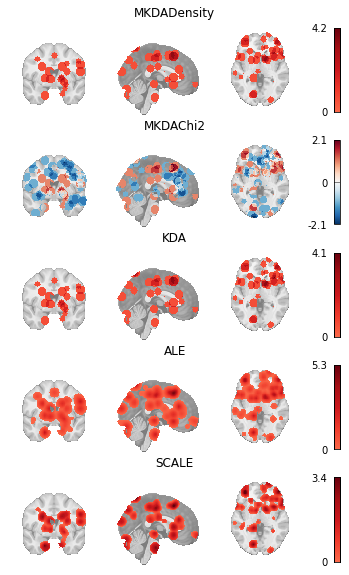

In [3]:
meta_results = {
    "MKDADensity": op.join(results_dir, "MKDADensity_z.nii.gz"),
    "MKDAChi2": op.join(results_dir, "MKDAChi2_z_desc-specificity.nii.gz"),
    "KDA": op.join(results_dir, "KDA_z.nii.gz"),
    "ALE": op.join(results_dir, "ALE_z.nii.gz"),
    "SCALE": op.join(results_dir, "SCALE_z.nii.gz"),
}

fig, axes = plt.subplots(
    figsize=(6, 10),
    nrows=5,
)
for i_meta, (name, file_) in enumerate(meta_results.items()):
    if "desc-specificity" in file_:
        cmap = "RdBu_r"
    else:
        cmap = "Reds"

    display = plotting.plot_stat_map(
        file_,
        annotate=False,
        axes=axes[i_meta],
        cmap=cmap,
        threshold=.01,
        cut_coords=[0, 0, 0],
        draw_cross=False,
        figure=fig,
    )
    axes[i_meta].set_title(name)
    colorbar = display._cbar
    colorbar_ticks = colorbar.get_ticks()
    if colorbar_ticks[0] < 0:
        new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
    else:
        new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
    colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_04.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_04_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

## Figure 5: Image-based meta-analysis results

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


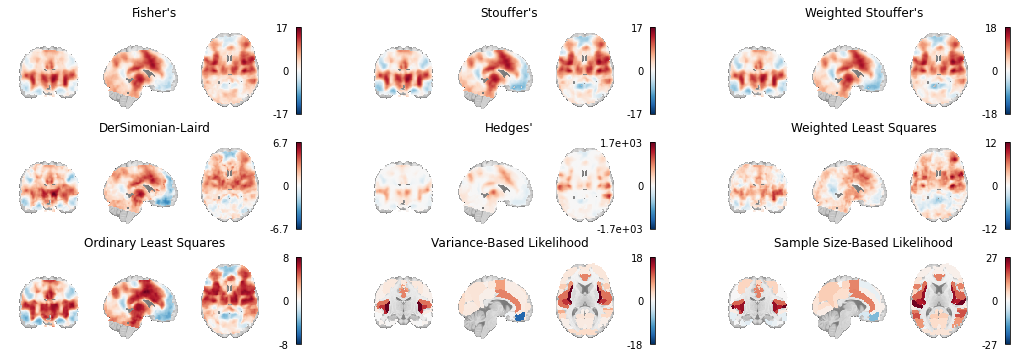

In [4]:
meta_results = {
    "DerSimonian-Laird": op.join(results_dir, "DerSimonianLaird_z.nii.gz"),
    "Stouffer's": op.join(results_dir, "Stouffers_z.nii.gz"),
    "Weighted Stouffer's": op.join(results_dir, "WeightedStouffers_z.nii.gz"),
    "Fisher's": op.join(results_dir, "Fishers_z.nii.gz"),
    "Ordinary Least Squares": op.join(results_dir, "OLS_z.nii.gz"),
    "Weighted Least Squares": op.join(results_dir, "WLS_z.nii.gz"),
    "Hedges'": op.join(results_dir, "Hedges_z.nii.gz"),
    "Variance-Based Likelihood": op.join(results_dir, "VBL_z.nii.gz"),
    "Sample Size-Based Likelihood": op.join(results_dir, "SSBL_z.nii.gz"),
}
order = [
    ["Fisher's", "Stouffer's", "Weighted Stouffer's"],
    ["DerSimonian-Laird", "Hedges'", "Weighted Least Squares"],
    ["Ordinary Least Squares", "Variance-Based Likelihood", "Sample Size-Based Likelihood"],
]

fig, axes = plt.subplots(
    figsize=(18, 6), 
    nrows=3,
    ncols=3,
)

for i_row, row_names in enumerate(order):
    for j_col, name in enumerate(row_names):
        file_ = meta_results[name]
        display = plotting.plot_stat_map(
            file_,
            annotate=False,
            axes=axes[i_row, j_col],
            cmap="RdBu_r",
            cut_coords=[5, -15, 10],
            draw_cross=False,
            figure=fig,
        )
        axes[i_row, j_col].set_title(name)

        colorbar = display._cbar
        colorbar_ticks = colorbar.get_ticks()
        if colorbar_ticks[0] < 0:
            new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
        else:
            new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
        colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_05.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_05_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

## Figure 6: Multiple comparisons corrected results

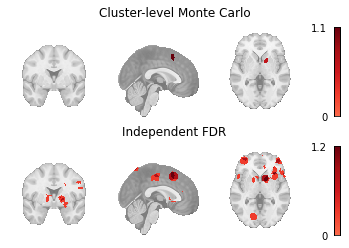

In [5]:
meta_results = {
    "Cluster-level Monte Carlo": op.join(
        results_dir, 
        "MKDADensity_FWE_z_level-cluster_corr-FWE_method-montecarlo.nii.gz"
    ),
    "Independent FDR": op.join(results_dir, "MKDADensity_FDR_z_corr-FDR_method-indep.nii.gz"),
}

fig, axes = plt.subplots(
    figsize=(6, 4), 
    nrows=2,
)

for i_meta, (name, file_) in enumerate(meta_results.items()):
    display = plotting.plot_stat_map(
        file_,
        annotate=False,
        axes=axes[i_meta],
        draw_cross=False,
        cmap="Reds",
        cut_coords=[0, 0, 0],
        figure=fig,
    )
    axes[i_meta].set_title(name)
    
    colorbar = display._cbar
    colorbar_ticks = colorbar.get_ticks()
    if colorbar_ticks[0] < 0:
        new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
    else:
        new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
    colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_06.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_06_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

## Figure 7: Subtraction results

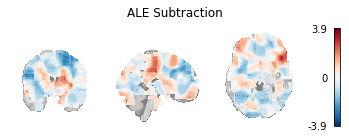

In [6]:
fig, ax = plt.subplots(
    figsize=(6, 2),
)
display = plotting.plot_stat_map(
    op.join(results_dir, "ALESubtraction_z_desc-group1MinusGroup2.nii.gz"),
    annotate=False,
    axes=ax,
    cmap="RdBu_r",
    cut_coords=[0, 0, 0],
    draw_cross=False,
    figure=fig,
)
ax.set_title("ALE Subtraction")

colorbar = display._cbar
colorbar_ticks = colorbar.get_ticks()
if colorbar_ticks[0] < 0:
    new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
else:
    new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_07.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_07_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

## Figure 8: MACM results

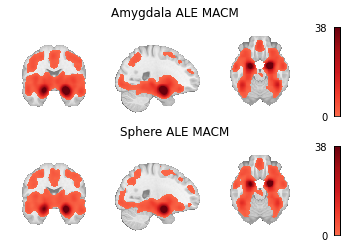

In [7]:
meta_results = {
    "Amygdala ALE MACM": op.join(results_dir, "ALE_Amygdala_z.nii.gz"),
    "Sphere ALE MACM": op.join(results_dir, "ALE_Sphere_z.nii.gz"),
}

fig, axes = plt.subplots(
    figsize=(6, 4), 
    nrows=2,
)

for i_meta, (name, file_) in enumerate(meta_results.items()):
    display = plotting.plot_stat_map(
        file_,
        annotate=False,
        axes=axes[i_meta],
        cmap="Reds",
        cut_coords=[24, -2, -20],
        draw_cross=False,
        figure=fig,
    )
    axes[i_meta].set_title(name)

    colorbar = display._cbar
    colorbar_ticks = colorbar.get_ticks()
    if colorbar_ticks[0] < 0:
        new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
    else:
        new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
    colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_08.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_08_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

### Figure 8a

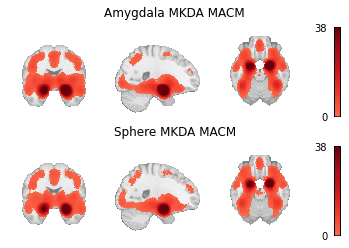

In [8]:
# MKDA

meta_results = {
    "Amygdala MKDA MACM": op.join(results_dir, "MKDADensity_Amygdala_z.nii.gz"),
    "Sphere MKDA MACM": op.join(results_dir, "MKDADensity_Sphere_z.nii.gz"),
}

fig, axes = plt.subplots(
    figsize=(6, 4), 
    nrows=2,
)

for i_meta, (name, file_) in enumerate(meta_results.items()):
    display = plotting.plot_stat_map(
        file_,
        annotate=False,
        axes=axes[i_meta],
        cmap="Reds",
        cut_coords=[24, -2, -20],
        draw_cross=False,
        figure=fig,
    )
    axes[i_meta].set_title(name)

    colorbar = display._cbar
    colorbar_ticks = colorbar.get_ticks()
    if colorbar_ticks[0] < 0:
        new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
    else:
        new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
    colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_08a.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_08a_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

### Figure 8b

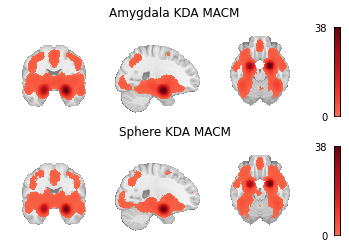

In [9]:
meta_results = {
    "Amygdala KDA MACM": op.join(results_dir, "KDA_Amygdala_z.nii.gz"),
    "Sphere KDA MACM": op.join(results_dir, "KDA_Sphere_z.nii.gz"),
}

fig, axes = plt.subplots(
    figsize=(6, 4), 
    nrows=2,
)

for i_meta, (name, file_) in enumerate(meta_results.items()):
    display = plotting.plot_stat_map(
        file_,
        annotate=False,
        axes=axes[i_meta],
        cmap="Reds",
        cut_coords=[24, -2, -20],
        draw_cross=False,
        figure=fig,
    )
    axes[i_meta].set_title(name)

    colorbar = display._cbar
    colorbar_ticks = colorbar.get_ticks()
    if colorbar_ticks[0] < 0:
        new_ticks = [colorbar_ticks[0], 0, colorbar_ticks[-1]]
    else:
        new_ticks = [colorbar_ticks[0], colorbar_ticks[-1]]
    colorbar.set_ticks(new_ticks, update_ticks=True)

fig.savefig(
    "figures/figure_08b.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "figures/figure_08b_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)